In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_35212\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('C:/Users/USER/Downloads/DATA/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [5]:
df['Virus Present'].value_counts()

Virus Present
0    200
1    200
Name: count, dtype: int64

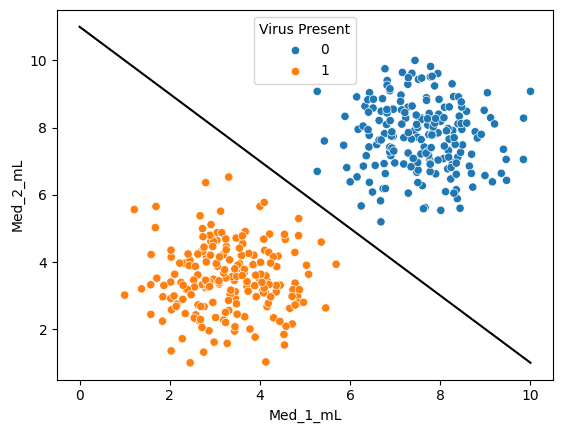

In [8]:
sns.scatterplot(df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black')

In [9]:
from sklearn.svm import SVC
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [10]:
model = SVC(kernel='linear', C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [12]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


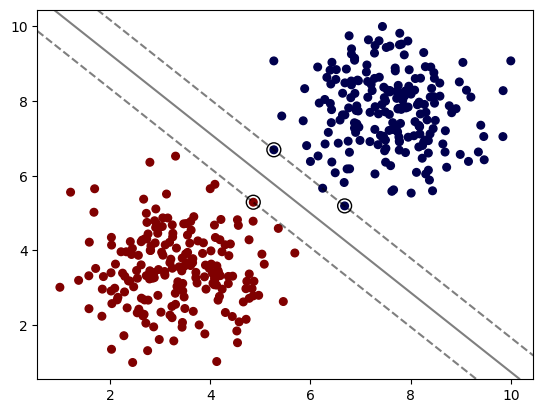

In [13]:
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


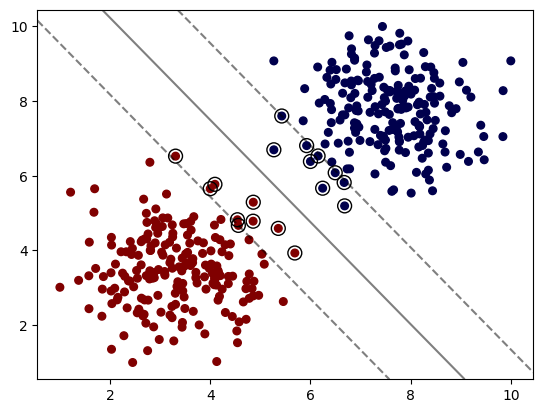

In [14]:
model = SVC(kernel='linear', C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


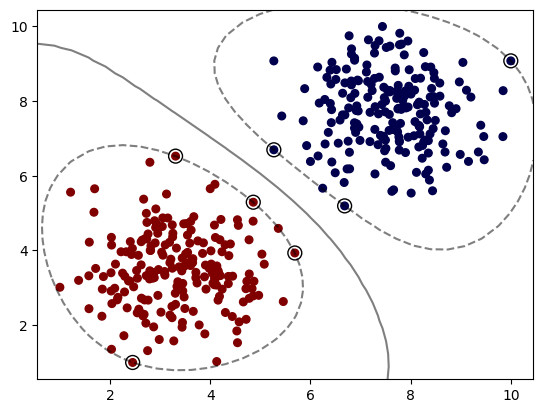

In [15]:
model = SVC(kernel='rbf', C=1000)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


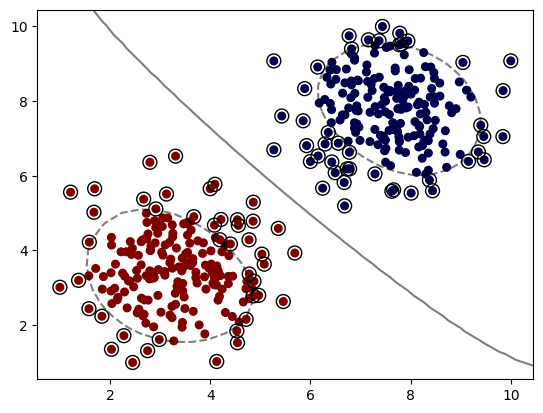

In [16]:
model = SVC(kernel='rbf', C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


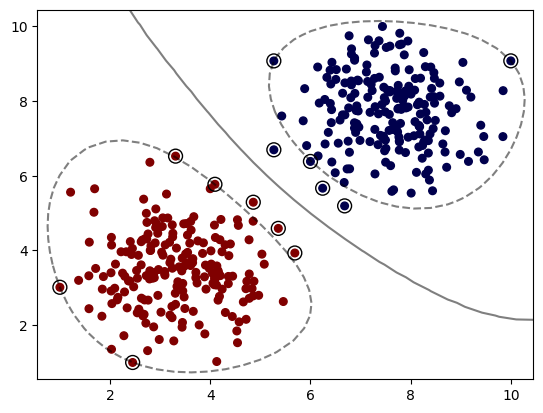

In [17]:
model = SVC(kernel='rbf', C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


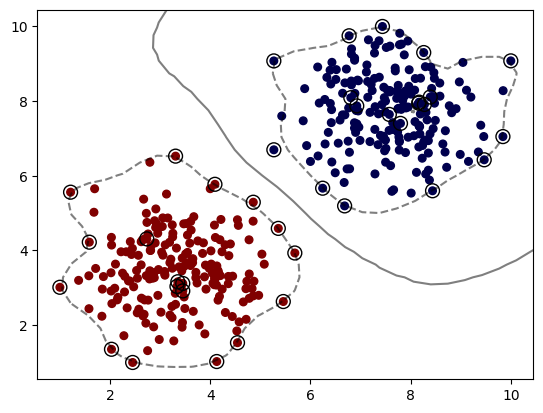

In [18]:
model = SVC(kernel='rbf', C=1,gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


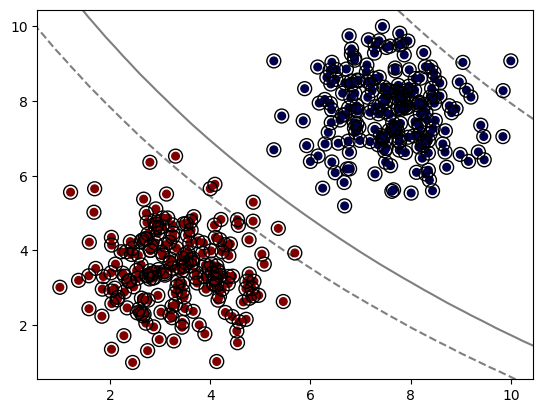

In [19]:
model = SVC(kernel='sigmoid', C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


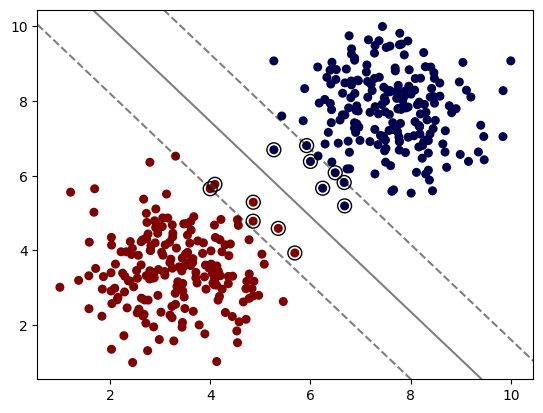

In [20]:
model = SVC(kernel='poly', degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


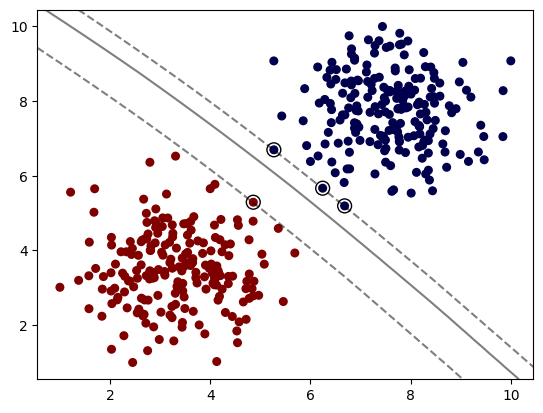

In [22]:
model = SVC(kernel='poly', degree=10)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [23]:
from sklearn.model_selection import GridSearchCV
svc = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svc,param_grid)

In [24]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [25]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}